# Classification

This exercise consists of three parts. Finish the first part to get a mark of 3.0; the first two parts for 4.0. Complete all three parts to get 5.0.

In [1]:
import common as cm
import numpy as np
import matplotlib.pyplot as plt

# Part 1: Naive Bayes for binary data

1.1 ) Given are the following objects (data) characterized with 4 binary attributes:

In [2]:
data = [
[1, 0, 1, 1],#1
[0, 1, 0, 0],#0
[0, 1, 1, 1],#1
[1, 0, 1, 0],#0
[1, 0, 0, 1],#0
[0, 0, 1, 1],#1
[1, 1, 1, 1],#1
[1, 0, 0, 1],#0
[0, 1, 0, 1],#1
[0, 0, 0, 1],#0
]

1.2) Each object is assigned to a class "0" or "1". The assignements are as follows (cl):

In [3]:
cl = [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]

1.3) When do you think an object is assigned to class "1"?

1.4) Build a naive Bayes classifier. For this reason, complete the following function. This function should return a vector [p0, p1], where p0 and p1 are propabilities that an input object (obj) belongs to, respectively, class "0" and "1". In case if any $P(x = 0\text{ or }1|CL = 0\text{ or }1) = 0$, replace it with $0.01$. Remember that the sum of p0 and p1 should be equal to 1 (you can do that by normalizing p0 and p1 by dividing them by their sum).

In [4]:
def prepareDataForNaiveBayes(data,cl):
    return list(set(cl)), np.array(data), np.array(cl)

def createProbabilitiesMatrix(data,cl,classes):
    return [getBinaryClassPropabilities(data,cl,classes[i]) for i in range(len(classes))]

def getBinaryClassPropabilities(data,cl,className):
    elementsFromClass = data[cl==className]
    classProbability = (len(elementsFromClass)/len(data))
    matrix = [className, 0.01 if classProbability == 0 else classProbability]
    matrix += [getBinaryAttributeProbabilities(attributeIndex,elementsFromClass) for attributeIndex in range(len(elementsFromClass[0]))]
    return matrix

def getBinaryAttributeProbabilities(index,elements):
    probability = sum(element[index] for element in elements) / len(elements)
    return 0.01 if probability == 0 else probability

def clasifyObjectWithProbabilitiesMatrix(obj,matrix):
    notNormalizedMatrix=[calculateClasificationProbability(obj,classMatrix) for classMatrix in matrix]
    return [x/sum(notNormalizedMatrix) for x in notNormalizedMatrix]

def calculateClasificationProbability(obj,classMatrix):
    toCalculate = [classMatrix[1]]
    toCalculate += [(classMatrix[attributeIndex + 2] if obj[attributeIndex] == 1 else 1 - classMatrix[attributeIndex + 2])for attributeIndex in range(len(obj))]
    return np.prod(toCalculate)

def getNaiveBayesProbabilities(obj, data, cl):
    listOfAllClasses, data, cl = prepareDataForNaiveBayes(data,cl)
    classesProbabilitiesMatrix = createProbabilitiesMatrix(data,cl,listOfAllClasses)
    return clasifyObjectWithProbabilitiesMatrix(obj,classesProbabilitiesMatrix)

1.6) Find objects which give a maximum probability for class "0" and "1". 

In [5]:
print(getNaiveBayesProbabilities([1, 0, 1, 1], data, cl))
print(getNaiveBayesProbabilities([1, 0, 0, 1], data, cl))

[0.3103448275862068, 0.6896551724137931]
[0.878048780487805, 0.12195121951219513]


## Part 2: k-NN algorithm

2.1) In common.py, there is defined a Euclidean distance function (cm.getEuclideanDistance(A, B)): 

In [6]:
#TEST
print(cm.getEuclideanDistance([0.0, 0.0], [0.0, 1.0]))
print(cm.getEuclideanDistance([0.0, 0.0], [1.0, 1.0]))

1.0
1.4142135623730951


2.2) Get test data set & display:<br>
- data = matrix n x m, n = the number of objects, m = the number of attributes<br>
- classified objects: [[list of objects (indices) being assigned to the fist class],[... to the second class],...,[... to the last class]]; note that the classes do not impose any preference order
- list of objects (indices) being not classified

IMPORTANT: plot $\rightarrow$ black squares represent non classified objects

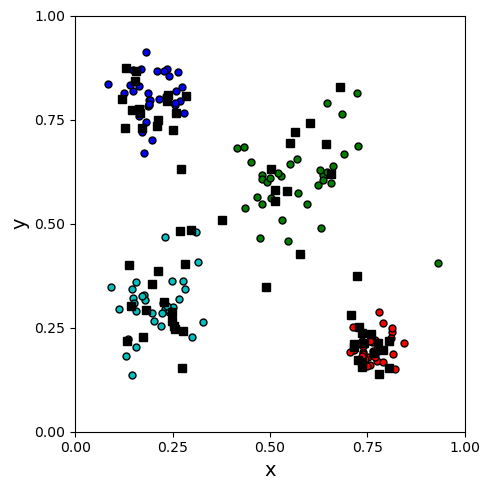

In [7]:
DATA = cm.getTestDataSet()
CLASSIFIED = cm.getTestClassified()
NOT_CLASSIFIED = cm.getTestNotClassified()
cm.displayDataSet(plt, DATA, CLASSIFIED, NOT_CLASSIFIED) #plt = plot package; see the imports above

### CLASS 1 = BLUE
### CLASS 2 = GREEN
### CLASS 3 = RED
### CLASS 4 = CYAN

2.3) k-NN implementation: Complete the below function. Use the "non-weighted" variant of k-NN.  

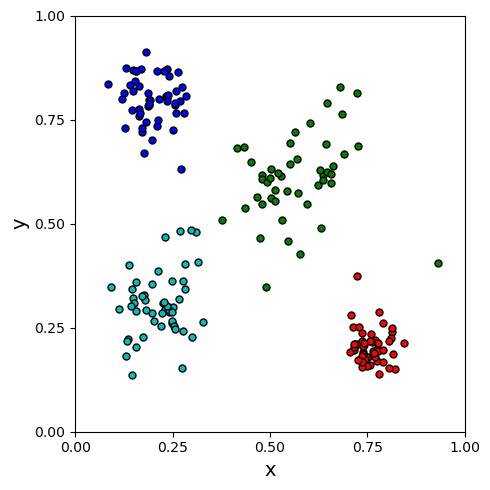

In [8]:
def getDistanceMatrixForGivenClassCluster(element,classCluster,DATA):
    return [[classElement,cm.getEuclideanDistance(DATA[element],DATA[classElement])] for classElement in classCluster]

def getDistanceOfTheKClassifiedElementsThatAreAStonesThrowAwayFromGivenElement(k,distanceMatrix):
    distanceMatrix.sort(key = lambda x: x[1])
    return distanceMatrix[:k]

def performVotingProcedureToDetermineInWhichClassShouldTheObjectBeLocated(CLASSIFIED,kNearestElements):
    classMatrix = []
    for kNearestElement in kNearestElements:
        clusterIndex = 0
        for index in range(len(CLASSIFIED)):
            if kNearestElement[0] in CLASSIFIED[index]: clusterIndex = index
        classMatrix.append(clusterIndex)
    return max(set(classMatrix), key=classMatrix.count)

def doKNN(K, DATA, CLASSIFIED, NOT_CLASSIFIED):
    CL = CLASSIFIED.copy()
    for notClassifiedElementIndex in NOT_CLASSIFIED:
        distanceMatrix = []
        for cluster in CLASSIFIED:
            distanceMatrix += getDistanceMatrixForGivenClassCluster(notClassifiedElementIndex,cluster,DATA)
        theKNearestElements = getDistanceOfTheKClassifiedElementsThatAreAStonesThrowAwayFromGivenElement(K,distanceMatrix)
        computedClass = performVotingProcedureToDetermineInWhichClassShouldTheObjectBeLocated(CLASSIFIED,theKNearestElements)
        CL[computedClass].append(notClassifiedElementIndex)
    return CL
        
NEW_CLASSIFIED = doKNN(2, DATA, CLASSIFIED, NOT_CLASSIFIED)
cm.displayDataSet(plt, DATA, NEW_CLASSIFIED)

# Part 3 - performance evaluation

3.1) You are asked to evaluate the performance of k-NN (weighted variant) for different K. Firstly, run the below piece of code and analyze the data. Which class do you think is the most difficult/easiest to describe/characterize?

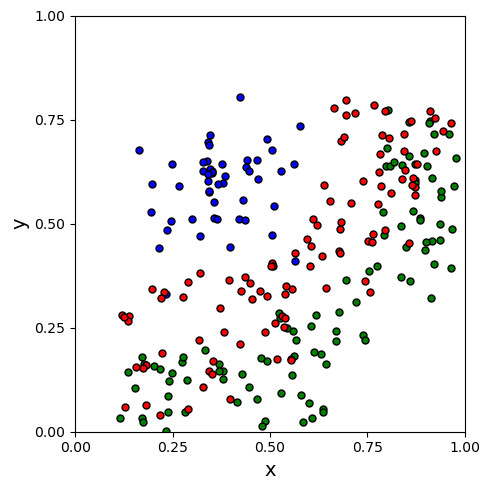

In [9]:
DATA_2 = cm.getTest2DataSet()
CLASSIFIED_2 = cm.getTest2Classified()
cm.displayDataSet(plt, DATA_2, CLASSIFIED_2)

3.2) To evaluate the performance of k-NN, you can check how well it predicts classes for new (not known previously) objects. For this reason, assume that you "do not know" the true class assignments for some random subset of objects from the data set. Firstly, you can generate some permutation of indices from 0 to 249 (one per object):

In [10]:
idxs = [i for i in range(250)]
np.random.shuffle(idxs)

Then, the below piece of code constructs temporary variables CLASSIFIED_TRAIN and NOT_CLASSIFIED_TEST. CLASSIFIED_TRAIN contains information on assignements for the first 50% random objects determined by "idxs", while NOT_CLASSIFIED_TEST contains the remianing "not classified" object indices. Run the code below and observe that 50% of some uniformly distributed data points are not classified. 

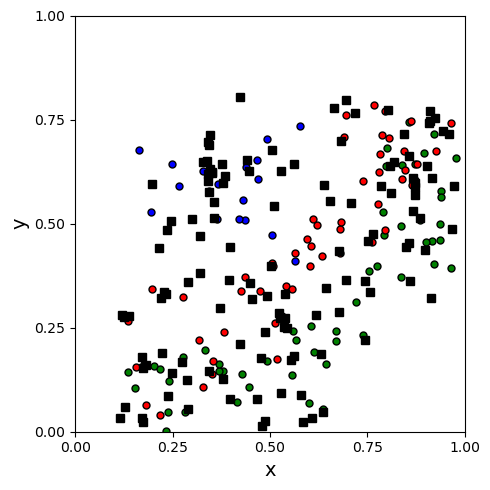

In [11]:
CLASSIFIED_TRAIN = [[], [], []]
NOT_CLASSIFIED_TEST = []
LIM = int(len(DATA_2) * 0.5)
for i in range(LIM):
    if idxs[i] < 50: CLASSIFIED_TRAIN[0].append(idxs[i])
    elif idxs[i] < 150: CLASSIFIED_TRAIN[1].append(idxs[i])
    else: CLASSIFIED_TRAIN[2].append(idxs[i])
for i in range(LIM, 250):
    NOT_CLASSIFIED_TEST.append(idxs[i])
cm.displayDataSet(plt, DATA_2, CLASSIFIED_TRAIN, NOT_CLASSIFIED_TEST)

3.3) Evaluate the performance of the weighted variant of k-NN for K = 1,3,5,7 and CLASSIFIED_TRAIN, NOT_CLASSIFIED_TEST data sets. For each K:<br>
- for each class, compute how many times an object has been correctly/incorrectly classified. E.g., if 10 objects are associated with the first class "BLUE" but k-NN classified correctly only 4 of them, the result is 4 (or 6 in case of incorrect assignments stat);<br>
- for each class, compute recall (number of correct assignments / total number of expected assignments, e.g., if 10 objects are associated with the first class "BLUE"  but k-NN classified correctly only 4 of them, recall for the first class is 40%);<br>  

Which class got the best/the worst recall. Why?
What is the best K. Are there any significant differences?
You can use cm.displayCompareDataSet(plt, DATA_2, CLASSIFIED_2, CL) to check (display) which solutions were classified incorrectly. These are marked with squares. The background of these squares is appropriately selected according to the true (expected) assignment. 

Correctly in class [0,1,2]  [30, 36, 33]
Incorrectly in class [0,1,2]  [1, 9, 16]
Recall for class [0,1,2]  [0.967741935483871, 0.8, 0.673469387755102]
The best recall:  0.967741935483871
The worst recall:  0.673469387755102


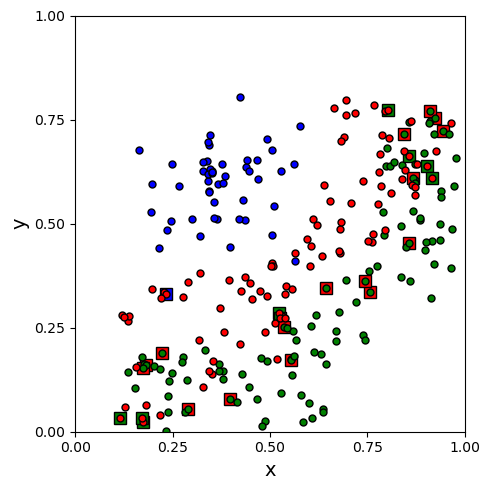

Correctly in class [0,1,2]  [30, 35, 34]
Incorrectly in class [0,1,2]  [1, 10, 15]
Recall for class [0,1,2]  [0.967741935483871, 0.7777777777777778, 0.6938775510204082]
The best recall:  0.967741935483871
The worst recall:  0.6938775510204082


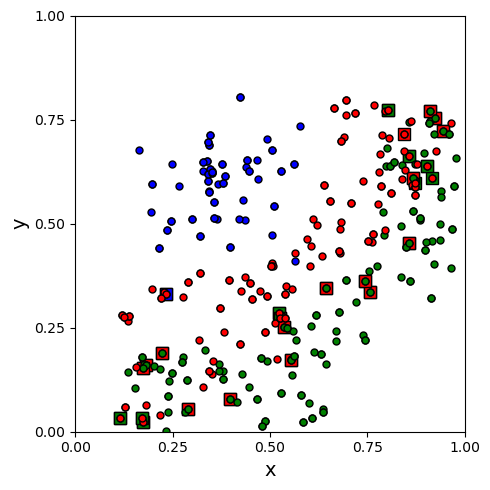

Correctly in class [0,1,2]  [30, 33, 36]
Incorrectly in class [0,1,2]  [1, 12, 13]
Recall for class [0,1,2]  [0.967741935483871, 0.7333333333333333, 0.7346938775510204]
The best recall:  0.967741935483871
The worst recall:  0.7333333333333333


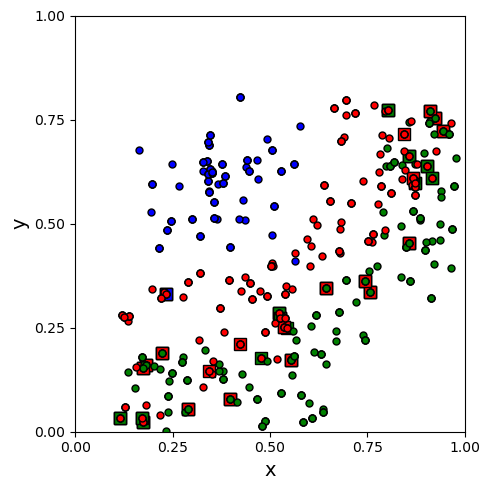

Correctly in class [0,1,2]  [30, 29, 36]
Incorrectly in class [0,1,2]  [1, 16, 13]
Recall for class [0,1,2]  [0.967741935483871, 0.6444444444444445, 0.7346938775510204]
The best recall:  0.967741935483871
The worst recall:  0.6444444444444445


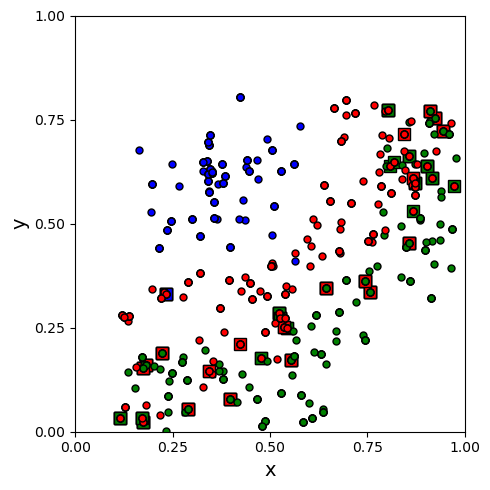

In [12]:
def doKNNWeightedWariant(K, DATA, CLASSIFIED, NOT_CLASSIFIED):
    CL = CLASSIFIED.copy()
    for notClassifiedElementIndex in NOT_CLASSIFIED:
        distanceMatrix = []
        for cluster in CLASSIFIED:
            distanceMatrix += getDistanceMatrixForGivenClassClusterWeightedWariant(notClassifiedElementIndex,list(set(cluster)),DATA)
        theKNearestElements = getDistanceOfTheKClassifiedElementsThatAreAStonesThrowAwayFromGivenElementWeightedWariant(K,distanceMatrix)
        computedClass = performVotingProcedureToDetermineInWhichClassShouldTheObjectBeLocatedWeightedWariant(CLASSIFIED,theKNearestElements,distanceMatrix)
        CL[computedClass].append(notClassifiedElementIndex)
    return CL

def getDistanceMatrixForGivenClassClusterWeightedWariant(element,classCluster,DATA):
    return [[classElement,cm.getEuclideanDistance(DATA[element],DATA[classElement])] for classElement in classCluster]

def getDistanceOfTheKClassifiedElementsThatAreAStonesThrowAwayFromGivenElementWeightedWariant(k,distanceMatrix):
    distanceMatrix.sort(key = lambda x: x[1])
    toPop = [i if distanceMatrix[i][1] == 0 else None for i in range(len(distanceMatrix))]
    for toPopElement in toPop:
        if toPopElement != None:
            distanceMatrix.pop(toPopElement)
    return distanceMatrix[:k]

def performVotingProcedureToDetermineInWhichClassShouldTheObjectBeLocatedWeightedWariant(CLASSIFIED,kNearestElements,distanceMatrix):
    classMatrix = []
    for kNearestElement in kNearestElements:
        clusterIndex = 0
        for index in range(len(CLASSIFIED)):
            if kNearestElement[0] in CLASSIFIED[index]: clusterIndex = index
        classMatrix.append(clusterIndex)
    return max(set(classMatrix), key=classMatrix.count)

def findClusterIndex(element,clusters):
    clusterIndex = 0
    for index in range(len(clusters)):
        if element in clusters[index]: clusterIndex = index
    return clusterIndex

for K in [1,3,5,7]:
    CL = doKNNWeightedWariant(K, DATA_2, CLASSIFIED_TRAIN, NOT_CLASSIFIED_TEST)
    CORRECTLY = [0,0,0]
    INCORRECTLY = [0,0,0]
    RECALL = [0,0,0]  
    for NOT_CLASSIFIED_TEST_element in NOT_CLASSIFIED_TEST:
        classified2ClusterIndex = findClusterIndex(NOT_CLASSIFIED_TEST_element,CLASSIFIED_2)
        notClassifiedClusterIndex = findClusterIndex(NOT_CLASSIFIED_TEST_element,CL)
        if classified2ClusterIndex == notClassifiedClusterIndex: CORRECTLY[classified2ClusterIndex] += 1
        else: INCORRECTLY[classified2ClusterIndex] += 1
    RECALL = [
      CORRECTLY[0] / (CORRECTLY[0] + INCORRECTLY [0]),
      CORRECTLY[1] / (CORRECTLY[1] + INCORRECTLY [1]),
      CORRECTLY[2] / (CORRECTLY[2] + INCORRECTLY [2]),
    ]
    print("Correctly in class [0,1,2] ",CORRECTLY)
    print("Incorrectly in class [0,1,2] ",INCORRECTLY)
    print("Recall for class [0,1,2] ",RECALL)
    print("The best recall: ", max(RECALL))
    print("The worst recall: ", min(RECALL))
    cm.displayCompareDataSet(plt, DATA_2, CLASSIFIED_2, CL)